In [22]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

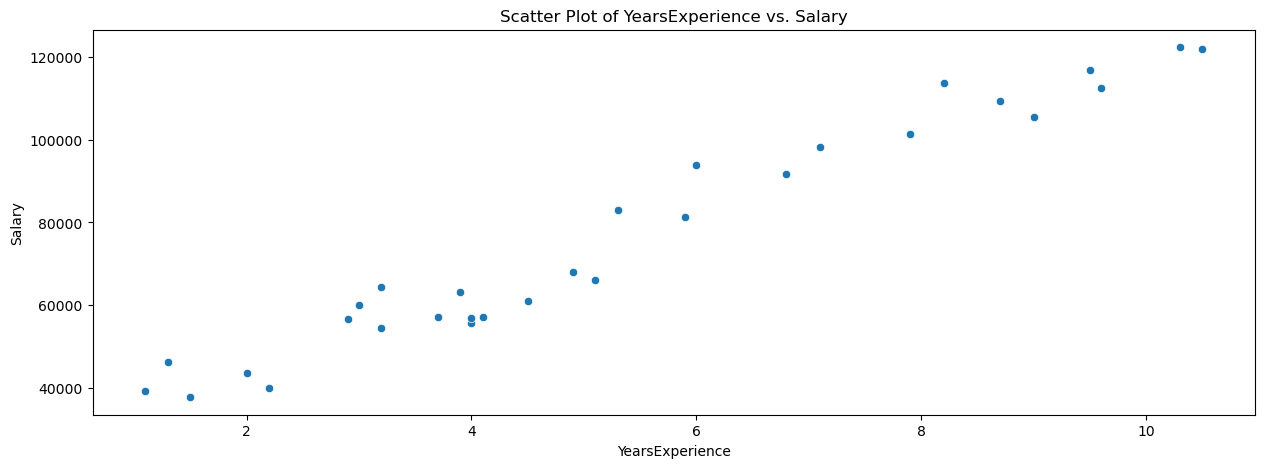

In [9]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Scatter Plot of YearsExperience vs. Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

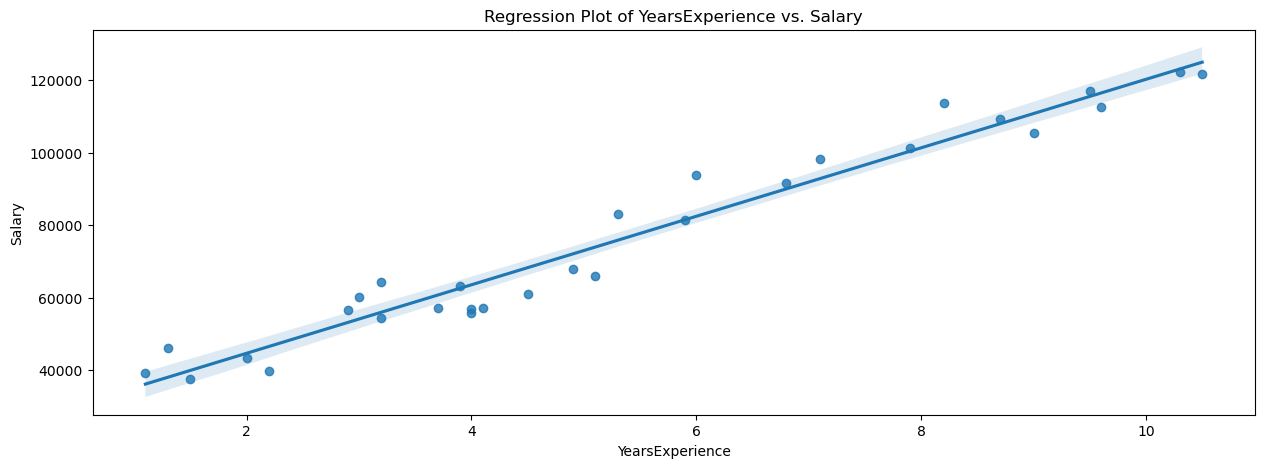

In [10]:
plt.figure(figsize=(15,5))
sns.regplot(x='YearsExperience', y='Salary', data=df)
plt.title('Regression Plot of YearsExperience vs. Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


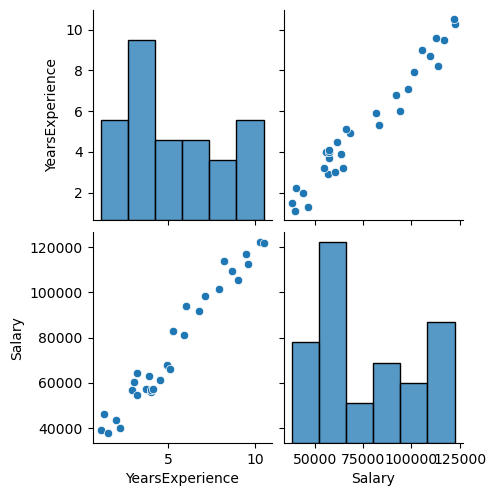

In [11]:
sns.pairplot(df)

<Axes: >

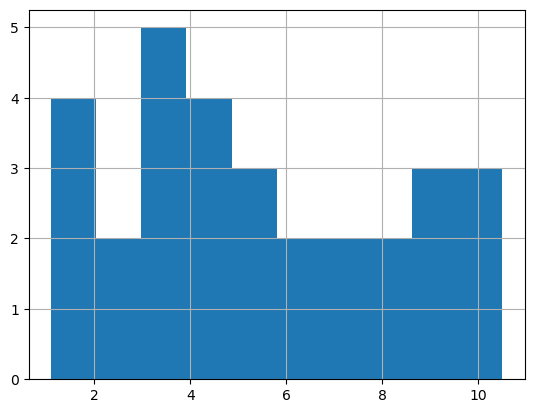

In [12]:
df["YearsExperience"].hist()

<Axes: >

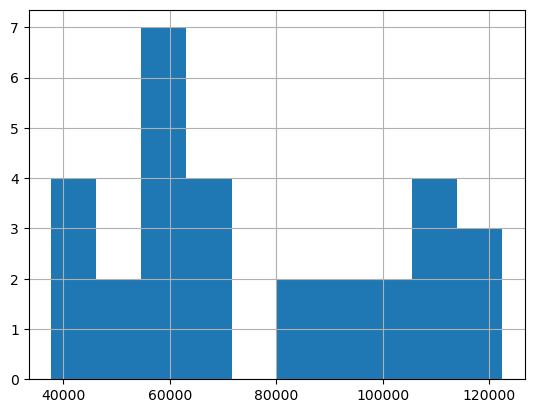

In [13]:
df["Salary"].hist()

In [15]:
x=df["Salary"]
x

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [16]:
y=df[["YearsExperience"]]
y

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [17]:
y_train,y_test,x_train,x_test=train_test_split(y,x,test_size=0.30)
le=LinearRegression()
le.fit(y_train,x_train)

LinearRegression()

In [18]:
x_pred=le.predict(y_test)
x_pred

array([ 39257.13094525,  63278.24357054,  82495.13367078,  93064.42322591,
        37335.44193523,  60395.71005551, 111320.46882113, 125733.13639631,
        44061.35347031])

In [19]:
mse=mean_squared_error(x_test,x_pred)
mse

39281704.24024788

In [20]:
print("mean squared error:",mse.round(3))
print("ROOT MEAN SQUARE ERROR",np.sqrt(mse).round(3))
print("R2 score:",r2_score(x_test,x_pred).round(3))

mean squared error: 39281704.24
ROOT MEAN SQUARE ERROR 6267.512
R2 score: 0.955


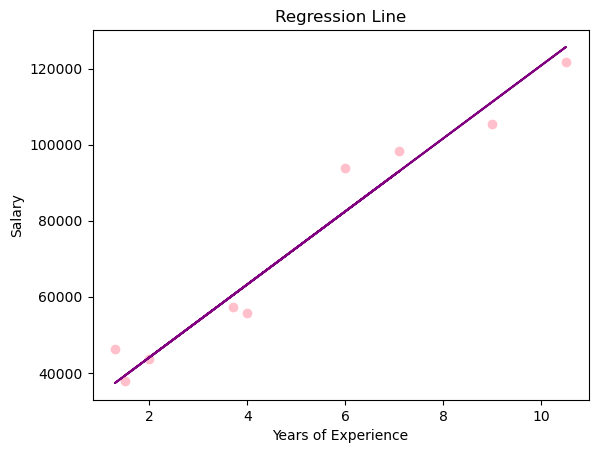

In [21]:
plt.scatter(y_test,x_test,color="pink")
plt.plot(y_test,x_pred,color="purple")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Regression Line")
plt.show()

In [23]:
y_sqrt_train,y_sqrt_test = np.sqrt(y_train), np.sqrt(y_test)
le.fit(y_sqrt_train,x_train)
x_pred_sqrt = le.predict(y_sqrt_test)
mse_sqrt = mean_squared_error(x_test, x_pred_sqrt)

In [24]:
print("\nModel with Square Root Transformation:")
print("Mean Squared Error:", mse_sqrt.round(3))
print("Root Mean Squared Error:", np.sqrt(mse_sqrt).round(3))
print("R2 Score:", r2_score(x_test,x_pred_sqrt).round(3))


Model with Square Root Transformation:
Mean Squared Error: 64130303.902
Root Mean Squared Error: 8008.14
R2 Score: 0.927


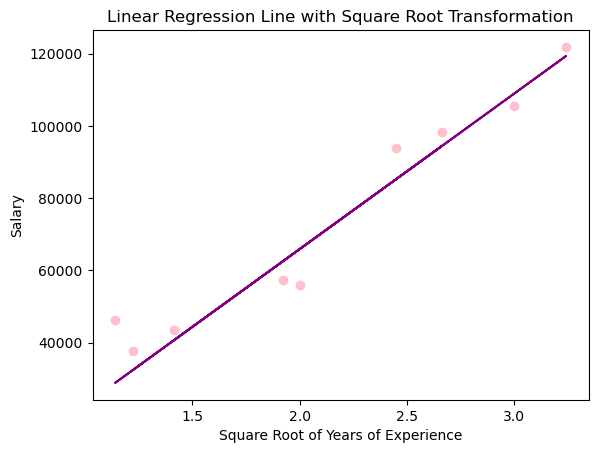

In [25]:
plt.scatter(y_sqrt_test,x_test, color="pink")
plt.plot(y_sqrt_test, x_pred_sqrt, color="purple")
plt.xlabel("Square Root of Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Line with Square Root Transformation")
plt.show()

In [26]:
y_log_train,y_log_test = np.log1p(y_train), np.log1p(y_test)
le.fit(y_log_train, x_train)
x_pred_log = le.predict(y_log_test)
mse_log = mean_squared_error(x_test,x_pred_log)

In [27]:
print("\nModel with Logarithmic Transformation:")
print("Mean Squared Error:", mse_log.round(3))
print("Root Mean Squared Error:", np.sqrt(mse_log).round(3))
print("R2 Score:", r2_score(x_test,x_pred_log).round(3))


Model with Logarithmic Transformation:
Mean Squared Error: 99295803.13
Root Mean Squared Error: 9964.728
R2 Score: 0.887


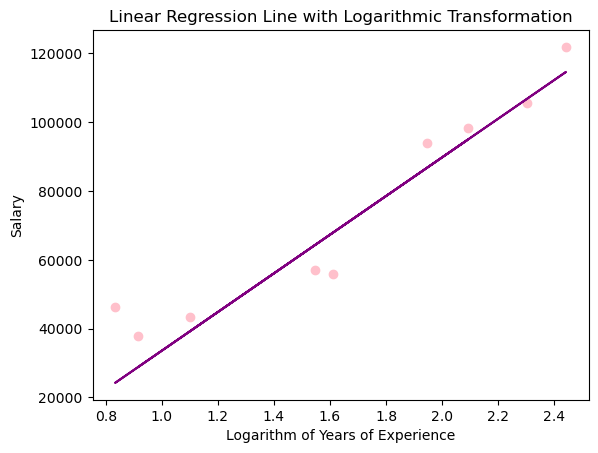

In [28]:
plt.scatter(y_log_test,x_test, color="pink")
plt.plot(y_log_test,x_pred_log, color="purple")
plt.xlabel("Logarithm of Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Line with Logarithmic Transformation")
plt.show()

In [29]:
y_log_train,y_log_test = np.log1p(y_train), np.log1p(y_test)
le.fit(y_log_train,x_train)
x_pred_log = le.predict(y_log_test)
mse_log = mean_squared_error(x_test,x_pred_log)

In [30]:
print("\nModel with Logarithmic Transformation:")
print("Mean Squared Error:", mse_log.round(3))
print("Root Mean Squared Error:", np.sqrt(mse_log).round(3))
print("R2 Score:", r2_score(x_test,x_pred_log).round(3))


Model with Logarithmic Transformation:
Mean Squared Error: 99295803.13
Root Mean Squared Error: 9964.728
R2 Score: 0.887


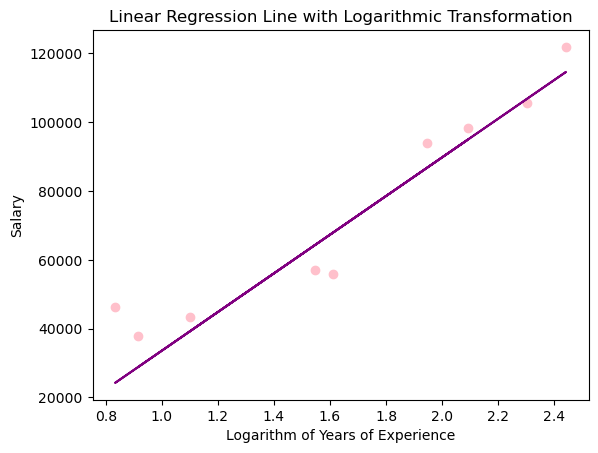

In [32]:
plt.scatter(y_log_test,x_test, color="pink")
plt.plot(y_log_test,x_pred_log, color="purple")
plt.xlabel("Logarithm of Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Line with Logarithmic Transformation")
plt.show()

In [33]:
y_exp_train,y_exp_test = np.exp(y_train), np.exp(y_test)
le.fit(y_exp_train,x_train)
x_pred_exp = le.predict(y_exp_test)
mse_exp = mean_squared_error(x_test,x_pred_exp)

In [34]:
print("\nModel with Exponential Transformation:")
print("Mean Squared Error:", mse_exp.round(3))
print("Root Mean Squared Error:", np.sqrt(mse_exp).round(3))
print("R2 Score:", r2_score(x_test, x_pred_exp).round(3))


Model with Exponential Transformation:
Mean Squared Error: 611531888.707
Root Mean Squared Error: 24729.171
R2 Score: 0.304


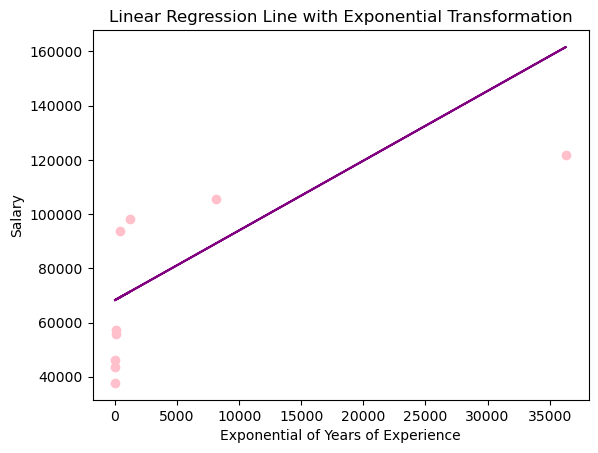

In [35]:
plt.scatter(y_exp_test, x_test, color="pink")
plt.plot(y_exp_test, x_pred_exp, color="purple")
plt.xlabel("Exponential of Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Line with Exponential Transformation")
plt.show()

In [36]:
y_poly_train,y_poly_test = y_train**2,y_test**2
le.fit(y_poly_train, x_train)
x_pred_poly = le.predict(y_poly_test)
mse_poly = mean_squared_error(x_test,x_pred_poly)

In [37]:
print("\nModel with Polynomial Transformation:")
print("Mean Squared Error:", mse_poly.round(3))
print("Root Mean Squared Error:", np.sqrt(mse_poly).round(3))
print("R2 Score:", r2_score(x_test,x_pred_poly).round(3))


Model with Polynomial Transformation:
Mean Squared Error: 98172235.424
Root Mean Squared Error: 9908.19
R2 Score: 0.888


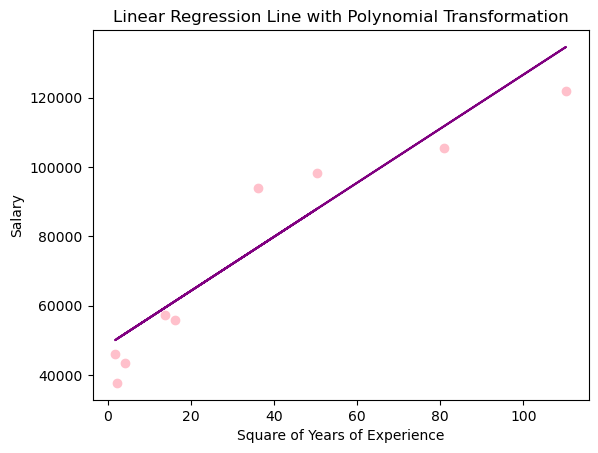

In [38]:
plt.scatter(y_poly_test,x_test, color="pink")
plt.plot(y_poly_test,x_pred_poly, color="purple")
plt.xlabel("Square of Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Line with Polynomial Transformation")
plt.show()